In [1]:
memory.limit()
memory.size()
gc()

[1] 32698

[1] 45.74

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,510164,27.3,1146655,61.3,621911,33.3
Vcells,941575,7.2,8388608,64.0,1602479,12.3


In [2]:
library(tidyverse, quietly = TRUE)

metrics_df <- read_csv("E:\\work\\results\\grid_search\\metrics.csv")
metrics_df <- metrics_df[metrics_df$metric == 'iou', ]
head(metrics_df)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Parsed with column specification:
cols(
  image = col_character(),
  class = col_character(),
  threshold = col_double(),
  metric = col_character(),
  value = col_double(),
  data_dataset = col_character(),
  model_activation = col_character(),
  model_depth = col_double(),
  model_in_channels = col_double(),
  model_out_classes = col_double(),
  model_residual_u

image,class,threshold,metric,value,data_dataset,model_activation,model_depth,model_in_channels,model_out_classes,model_residual_units,model_width,model_width_ratio,job_hash,epoch,loss,predict_time
bremen_000075_000019,road,0.5,iou,0.9271246,cityscapes,piecewise_linear,8,3,19,2,50,1.4,025cb7327dfa11ba27fd6fafcec81e13,237,0.32667,611.5712
bremen_000075_000019,sidewalk,0.5,iou,0.8601424,cityscapes,piecewise_linear,8,3,19,2,50,1.4,025cb7327dfa11ba27fd6fafcec81e13,237,0.32667,611.5712
bremen_000075_000019,building,0.5,iou,0.8424176,cityscapes,piecewise_linear,8,3,19,2,50,1.4,025cb7327dfa11ba27fd6fafcec81e13,237,0.32667,611.5712
bremen_000075_000019,fence,0.5,iou,0.5349227,cityscapes,piecewise_linear,8,3,19,2,50,1.4,025cb7327dfa11ba27fd6fafcec81e13,237,0.32667,611.5712
bremen_000075_000019,pole,0.5,iou,0.5253563,cityscapes,piecewise_linear,8,3,19,2,50,1.4,025cb7327dfa11ba27fd6fafcec81e13,237,0.32667,611.5712
bremen_000075_000019,traffic light,0.5,iou,0.5207297,cityscapes,piecewise_linear,8,3,19,2,50,1.4,025cb7327dfa11ba27fd6fafcec81e13,237,0.32667,611.5712


In [3]:
model <- aov(value~job_hash, data=metrics_df)
summary(model)

                Df Sum Sq Mean Sq F value Pr(>F)    
job_hash       143   1491  10.429   126.2 <2e-16 ***
Residuals   875952  72418   0.083                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

**A one-way ANOVA showed that the mean performance differed significantly between models (F = 126.2, df = 143, 12, p < 2e-16).**

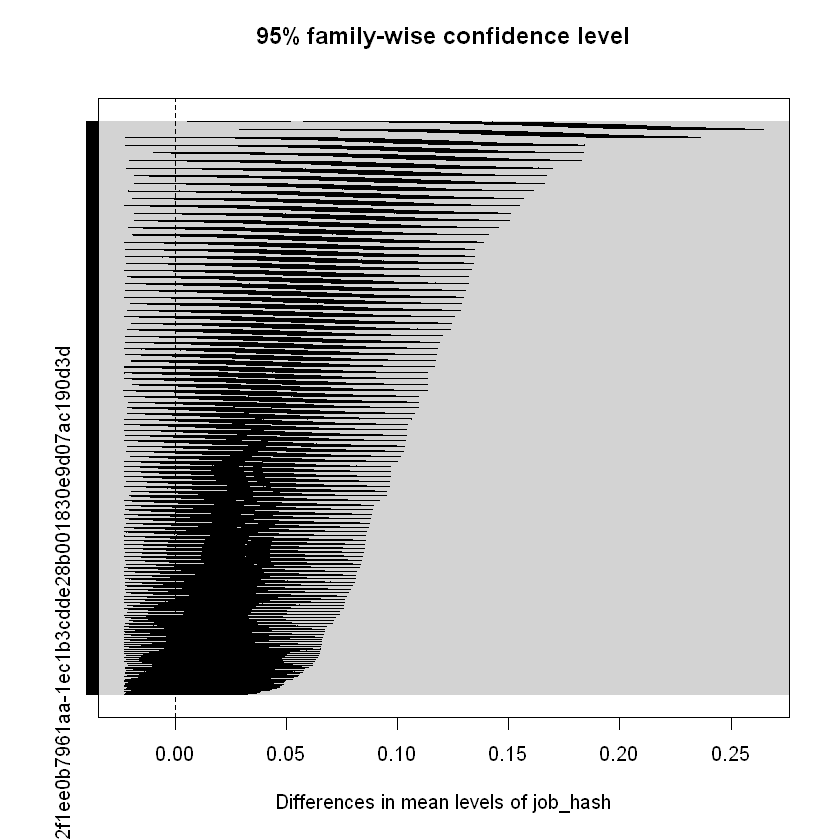

In [4]:
tukey <- TukeyHSD(model, conf.level=.95, ordered=TRUE)
plot(tukey)

In [6]:
results <- as.data.frame(tukey$job_hash)
names(results) <- c("diff", "lwr", "upr", "p_adj")
results <- results[order(results$diff, decreasing=TRUE), ] 
write.csv(results,"tukey.csv", row.names = TRUE)

In [35]:
length( which( results$p_adj > 0.05 ) )
length( which( results$p_adj < 0.05 ) )

[1] 3471

[1] 6825